<a href="https://colab.research.google.com/github/ykitaguchi77/Foundation_model/blob/main/RETFound_colab_APTOSxJSAIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETFound**

This is the official notebook for RETFound (*Nature* 2023).

This notebook demonstrates <font color=orange size=2>**RETFound** usage on your customise data.

Make sure to specify a GPU runtime. Click Runtime -->Change runtime type --> Hardware --> GPU and save.

Contact: [yukun.zhou.19@ucl.ac.uk] [ykzhoua@gmail.com]...

If you find this notebook useful, please star our [project on Github](https://github.com/rmaphoh/RETFound_MAE) and cite [RETFound paper](https://www.nature.com/articles/s41586-023-06555-x).

👋 Join RETFound support team by pulling requests or dropping emails to
* improve notebook in organisation, generalisation, and flexibility
* organise new CFP or OCT dataset in structure
* feedback suggestions to improve user experience


## **Install dependencies**

In [1]:
%%shell
MINICONDA_INSTALLER_SCRIPT=Miniconda3-py310_23.5.2-0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT > /dev/null 2>&1
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX > /dev/null 2>&1

In [2]:
%%shell
eval "$(conda shell.bash hook)" # copy conda command to shell
source /usr/local/etc/profile.d/conda.sh
conda init
conda create -n retfound python=3.11.0 -y > /dev/null 2>&1
conda activate retfound
python --version
pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu121 > /dev/null 2>&1

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.10/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
modified      /root/.bashrc

==> For changes to take effect, close and re-open your current shell. <==

Python 3.11.0


## **Clone RETFound and install packages**

In [3]:
%%shell
git clone https://github.com/rmaphoh/RETFound_MAE/
source activate retfound
cd RETFound_MAE/
pip install -r requirements.txt > /dev/null 2>&1
pip install matplotlib-inline > /dev/null 2>&1

Cloning into 'RETFound_MAE'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 190 (delta 94), reused 73 (delta 73), pack-reused 79 (from 2)
Receiving objects: 100% (190/190), 423.48 KiB | 12.83 MiB/s, done.
Resolving deltas: 100% (108/108), done.


## Adjust files and download pre-trained weights

In [4]:
!gdown 1Sz_T-SuMJAHbMzzzwo63NVjaIcjz6KsZ
!gdown 1Wd5OuU3jXQbGmojPlGIWqT-p0DhiEQJE
!gdown 12uuzeBG5_eYKaPk7qBVB9FAOUvUxsGLt
!gdown 1HwNL2gzMq2TDWigF9yxdRKJ1mjVOmGyY

Downloading...
From (original): https://drive.google.com/uc?id=1Sz_T-SuMJAHbMzzzwo63NVjaIcjz6KsZ
From (redirected): https://drive.google.com/uc?id=1Sz_T-SuMJAHbMzzzwo63NVjaIcjz6KsZ&confirm=t&uuid=484ab7f4-ab5d-441f-ae78-448039c485bd
To: /content/main_finetune.py
100% 18.7k/18.7k [00:00<00:00, 72.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Wd5OuU3jXQbGmojPlGIWqT-p0DhiEQJE
From (redirected): https://drive.google.com/uc?id=1Wd5OuU3jXQbGmojPlGIWqT-p0DhiEQJE&confirm=t&uuid=17431547-c94e-41f2-86da-52617dfe8268
To: /content/teacher_checkpoint.pth
100% 1.61G/1.61G [00:25<00:00, 63.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=12uuzeBG5_eYKaPk7qBVB9FAOUvUxsGLt
From (redirected): https://drive.google.com/uc?id=12uuzeBG5_eYKaPk7qBVB9FAOUvUxsGLt&confirm=t&uuid=a107c244-43cf-4ce2-8bd1-b6ee493b28be
To: /content/main_linear_probe.py
100% 18.9k/18.9k [00:00<00:00, 58.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1HwNL2gzMq2TDWi

In [5]:
%%shell
mv main_finetune.py RETFound_MAE/
mv teacher_checkpoint.pth RETFound_MAE/
mv main_linear_probe.py RETFound_MAE/
mv engine_finetune.py RETFound_MAE/

## **Prepare data**






###Organise your data into a directory structure (using APTOS2019-DR as an example below)###

<img src="https://drive.google.com/uc?export=view&id=1FP59R9A5OE8kQUlG-pJAFC2JgQAcwqo7" width="200px" />


In [6]:
!gdown --id 1kbdFFf5pb0FoXKDqn6L4FU5ftw5Vdo1O

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kbdFFf5pb0FoXKDqn6L4FU5ftw5Vdo1O
To: /content/APTOS2019_subsample.zip
100% 16.6M/16.6M [00:00<00:00, 19.4MB/s]


In [7]:
%%shell
mv APTOS2019_subsample.zip RETFound_MAE/
cd RETFound_MAE
unzip APTOS2019_subsample.zip > /dev/null 2>&1

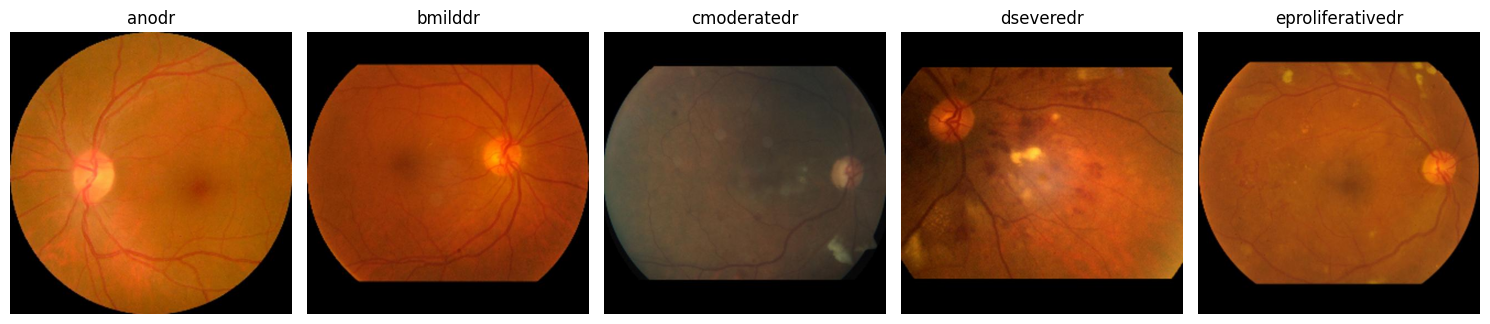

In [8]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define class folder names in desired order
class_folders = [
    "anodr", "bmilddr", "cmoderatedr", "dseveredr", "eproliferativedr"
]

base_path = "/content/RETFound_MAE/APTOS2019_subsample/train"
images = []

# Randomly select one image from each class
for class_name in class_folders:
    class_dir = os.path.join(base_path, class_name)
    files = [f for f in os.listdir(class_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
    if not files:
        continue
    chosen = random.choice(files)
    img_path = os.path.join(class_dir, chosen)
    images.append((class_name, Image.open(img_path)))

# Plot the selected images
plt.figure(figsize=(15, 5))
for i, (label, img) in enumerate(images):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()


##**Start training**##

Change the nb_classes and data_path based on your data setting.

In [ ]:
%%shell
cd RETFound_MAE
eval "$(conda shell.bash hook)" # copy conda command to shell
source activate retfound
torchrun --nproc_per_node=1 --master_port=48798 main_linear_probe.py \
    --model RETFound_dinov2 \
    --savemodel \
    --global_pool \
    --batch_size 16 \
    --world_size 1 \
    --epochs 20 \
    --blr 5e-3 --layer_decay 0.65 \
    --weight_decay 0.05 --drop_path 0.2 \
    --nb_classes 5 \
    --data_path ./APTOS2019_subsample \
    --input_size 224 \
    --task RETFound_dinov2_APTOS2019_subsample_linearprobe \
    --finetune ./teacher_checkpoint.pth

| distributed init (rank 0): env://, gpu 0
[09:21:50.006473] job dir: /content/RETFound_MAE
[09:21:50.006614] Namespace(batch_size=16,
epochs=20,
accum_iter=1,
model='RETFound_dinov2',
input_size=224,
drop_path=0.2,
clip_grad=None,
weight_decay=0.05,
lr=None,
blr=0.005,
layer_decay=0.65,
min_lr=1e-06,
warmup_epochs=10,
color_jitter=None,
aa='rand-m9-mstd0.5-inc1',
smoothing=0.1,
reprob=0.25,
remode='pixel',
recount=1,
resplit=False,
mixup=0,
cutmix=0,
cutmix_minmax=None,
mixup_prob=1.0,
mixup_switch_prob=0.5,
mixup_mode='batch',
finetune='./teacher_checkpoint.pth',
task='RETFound_dinov2_APTOS2019_subsample_linearprobe',
global_pool=True,
data_path='./APTOS2019_subsample',
nb_classes=5,
output_dir='./output_dir',
log_dir='./output_logs',
device='cuda',
seed=0,
resume='',
start_epoch=0,
eval=False,
dist_eval=False,
num_workers=10,
pin_mem=True,
world_size=1,
local_rank=-1,
dist_on_itp=False,
dist_url='env://',
savemodel=True,
norm='IMAGENET',
enhance=False,
datasets_seed=2026,
rank=0,
gp

In [ ]:
%%shell
cd RETFound_MAE
eval "$(conda shell.bash hook)" # copy conda command to shell
source activate retfound
torchrun --nproc_per_node=1 --master_port=48798 main_finetune.py \
    --model RETFound_dinov2 \
    --savemodel \
    --global_pool \
    --batch_size 16 \
    --world_size 1 \
    --epochs 20 \
    --blr 5e-3 --layer_decay 0.65 \
    --weight_decay 0.05 --drop_path 0.2 \
    --nb_classes 5 \
    --data_path ./APTOS2019_subsample \
    --input_size 224 \
    --task RETFound_dinov2_APTOS2019_subsample_finetune \
    --finetune ./teacher_checkpoint.pth

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Define paths to the matrix images
paths = {
    "Finetune": "/content/RETFound_MAE/output_dir/RETFound_dinov2_APTOS2019_subsample_finetune/confusion_matrix_test.jpg",
    "Linear Probe": "/content/RETFound_MAE/output_dir/RETFound_dinov2_APTOS2019_subsample_linearprobe/confusion_matrix_test.jpg"
}

# Plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for ax, (title, path) in zip(axes, paths.items()):
    try:
        img = Image.open(path)
        ax.imshow(img)
        ax.set_title(title)
        ax.axis("off")
    except Exception as e:
        ax.text(0.5, 0.5, f"Failed to load\n{path}\n{e}", ha='center', va='center')
        ax.axis("off")

plt.tight_layout()
plt.show()
